# Introduction

Data wrangling is a core skill that everyone who works with data should be familiar with since so much of the world's data isn't clean. We need to wrangle our data for good outcomes, otherwise there could be consequences. If we analyze, visualize, or model our data before we wrangle it, our consequences could be making mistakes, missing out on cool insights, and wasting time. **So best practices say wrangle. Always.**

Through this project will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it.

The dataset that we will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user [@dog_rates](https://twitter.com/dog_rates), also known as [WeRateDogs](https://en.wikipedia.org/wiki/WeRateDogs).

## Gather

Gathering Data for this Project composed from three pieces of data as described below:

- The WeRateDogs Twitter archive. We will download this file manually by clicking the following link:  [twitter_archive_enhanced.csv](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv)
- The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv
- Each tweet's retweet count and favorite (i.e. "like") count at minimum, and any additional data we will find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, we will query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then we will read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.

** Let's get started **

In [1]:
# Import the libraries that we will need in this project
import pandas as pd
import datetime as dt
import numpy as np
import requests
import tweepy
import json
import time
import re
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Read the twitter-archive-enhanced.csv file and store it as dataframe in archive
archieve = pd.read_csv('twitter-archive-enhanced.csv', encoding='utf-8')

# Quick review of the archive file
archieve.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
# Gather file information
archieve.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [4]:
# Using Requests library download the images tsv file from Udacity
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(url.split('/')[-1], mode='wb') as outfile:
    outfile.write(response.content)

# Read the contents of downloaded tsv file into a dataframe 'images'
images = pd.read_csv('image-predictions.tsv', sep='\t', encoding='utf-8')

# Quick check to the file content and structure
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [5]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [6]:
# Read the saved tweet_json.txt file into a dataframe
json_tweets = pd.read_csv('tweet_json.txt', encoding = 'utf-8')
json_tweets.head()

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,38703,8562,6975017,134486,2017-08-01 16:23:56
1,892177421306343426,33175,6299,6975017,134486,2017-08-01 00:17:27
2,891815181378084864,24971,4180,6975017,134486,2017-07-31 00:18:03
3,891689557279858688,42101,8685,6975017,134486,2017-07-30 15:58:51
4,891327558926688256,40243,9455,6975017,134486,2017-07-29 16:00:24


## Assess

After gathering the data, the next step is to assess is for any quality and tidyness issues. Assessing can be done both visually and programmatically and here we are going to assess our data programmatically.

In [7]:
# Assessing the twitter archieve file
archieve

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [8]:
archieve.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

From this information, we can see few datatype issues. Such as,
- 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', and 'retweeted_status_user_id' must be integers or can also be as strings instead of float. But when we visualize the data in these fields, they are mostly empty. So, better we drop these fields, since they don't serve any useful purpose.
- 'timestamp' and 'retweeted_status_timestamp' must be in datetime type instead of objects.

In [9]:
# Let's check few column-wise data
archieve['name'].value_counts()

None         745
a             55
Charlie       12
Lucy          11
Oliver        11
Cooper        11
Tucker        10
Lola          10
Penny         10
Winston        9
Bo             9
Sadie          8
the            8
an             7
Buddy          7
Toby           7
Daisy          7
Bailey         7
Bella          6
Jack           6
Scout          6
Koda           6
Leo            6
Dave           6
Stanley        6
Jax            6
Oscar          6
Milo           6
Rusty          6
Alfie          5
            ... 
Lilah          1
Hazel          1
Ben            1
Shiloh         1
Tino           1
Randall        1
Maya           1
Einstein       1
Jordy          1
Bayley         1
his            1
Kaia           1
Akumi          1
Scruffers      1
Mimosa         1
Glenn          1
Bloop          1
Tobi           1
Cilantro       1
Luther         1
Augie          1
Richie         1
Travis         1
Gustav         1
Aubie          1
Buddah         1
Cuddles        1
Venti         

On observing the 'name' data, we can see there are few anonymous names like 'None', 'a', 'an', 'the', 'such'. So, we can correct this data by changing them as null values.

In [10]:
archieve['doggo'].unique()

array(['None', 'doggo'], dtype=object)

In [11]:
archieve['floofer'].unique()

array(['None', 'floofer'], dtype=object)

In [12]:
archieve['pupper'].unique()

array(['None', 'pupper'], dtype=object)

In [13]:
archieve['puppo'].unique()

array(['None', 'puppo'], dtype=object)

Here, 'doggo', 'floofer', 'pupper', and 'puppo' are nicknames for different stages in dog's life. So, these columns can be melted as one coulmn, may be 'stage' with unique values ['doggo', 'floofer', 'pupper', 'puppo'] to give a tidy to look to our data.

In [14]:
archieve.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [15]:
archieve.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

- Seems like we have few ouliers in ratings
- Also, we can see some tweets have no rating
- Some are even having decimal values

We need to verify whether these are valid ones or not. Also, need to extract rating from the text data, if available.

In [16]:
# Assess image-predictions file
images

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [17]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
images['jpg_url'].duplicated().any()

True

In this image-prediction file, based on the predictions data given, we can add two columns one telling whether the given image is a dog or not, if so, then another column with the dog's breed information. Also, we can drop the coulmns representing the predictions values which are too complicated.

Also, seems like we have few tweets id's with same image url

If we observe the total counts of both archieve and images dataframes, there is a mismatch in the counts. In a sense, we have retweets in archieve file which doesn't have images. So, these entries must be dropped.

In [19]:
# Assessing tweet_json text file
json_tweets

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,38703,8562,6975017,134486,2017-08-01 16:23:56
1,892177421306343426,33175,6299,6975017,134486,2017-08-01 00:17:27
2,891815181378084864,24971,4180,6975017,134486,2017-07-31 00:18:03
3,891689557279858688,42101,8685,6975017,134486,2017-07-30 15:58:51
4,891327558926688256,40243,9455,6975017,134486,2017-07-29 16:00:24
5,891087950875897856,20179,3130,6975017,134486,2017-07-29 00:08:17
6,890971913173991426,11821,2086,6975017,134486,2017-07-28 16:27:12
7,890729181411237888,65386,18996,6975017,134486,2017-07-28 00:22:40
8,890609185150312448,27733,4284,6975017,134486,2017-07-27 16:25:51
9,890240255349198849,31875,7455,6975017,134486,2017-07-26 15:59:51


In [20]:
json_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 6 columns):
tweet_id           2356 non-null int64
favorites          2356 non-null int64
retweets           2356 non-null int64
user_followers     2356 non-null int64
user_favourites    2356 non-null int64
date_time          2356 non-null object
dtypes: int64(5), object(1)
memory usage: 110.5+ KB


Here, date_time should be in datetime datatype instead of an object

In [21]:
json_tweets.duplicated().any()

True

In [22]:
(json_tweets['tweet_id'].value_counts()) > 1

666020888022790149     True
749075273010798592    False
691820333922455552    False
700462010979500032    False
780858289093574656    False
699775878809702401    False
880095782870896641    False
760521673607086080    False
776477788987613185    False
715696743237730304    False
825120256414846976    False
714606013974974464    False
760539183865880579    False
813157409116065792    False
676430933382295552    False
847251039262605312    False
741099773336379392    False
769212283578875904    False
798644042770751489    False
782969140009107456    False
838085839343206401    False
674394782723014656    False
672082170312290304    False
670093938074779648    False
759923798737051648    False
818259473185828864    False
809920764300447744    False
666051853826850816    False
743510151680958465    False
673686845050527744    False
                      ...  
720775346191278080    False
879492040517615616    False
785927819176054784    False
834209720923721728    False
857062103051644929  

In this file, '666020888022790149' has been duplicated. So we need to drop the multiple entried by this id.



## Quality

Issues with content in our files. Low quality data is also known as dirty data. 

**`archieve` table**
- Some columns, such as `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp` are mostly empty. So, these fields can be dropped since they don't serve any useful purpose in our analysis.
- `timestamp` must be in datetime type instead of objects
- In several columns null objects are non-null i.e., as 'None' instead of NaN(null-object)
- `name` column have invalid names such as 'a', 'an', 'the', 'such'
- Extract names from `text` column 
- Need to retain only original ratings (no retweets) that have images
- Need to drop multiple repetitions of the url in same entry under `expanded_urls` column 
- Extract valid ratings from `text` and correct invalid ones

**`images` table**
- Missing values from images dataset (2075 rows instead of 2356)

**`json_tweeets` table**
- The tweet with `tweet_id` 666020888022790149 has been duplicated


### Tidiness

Issues with structure in our files. Untidy data is also known as messy data.

- All the three tables can be combined into one
- Multiple columns representing dog stages can be melted to one
- Based on prediction values, create columns with image predicion value(dog or not) and another with the breed information


## Clean

Cleaning data is the third step in data wrangling. Here we need to clean the quality and tidiness issues identified in assess step.

In [23]:
# Make a copy of all the datasets before cleaning
archieve_cpy = archieve.copy()
images_cpy = images.copy()
json_tweets_cpy = json_tweets.copy()

In [24]:
archieve_cpy

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


### Clean 1: Drop the empty columns

In [25]:
archieve = archieve.drop(columns=['in_reply_to_status_id', 
                                  'in_reply_to_user_id'], axis=1)

### Clean 2: Convert `timestamp`  to datetime datatypes

In [26]:
archieve['timestamp'] = pd.to_datetime(archieve['timestamp'])

### Test

In [27]:
archieve.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                      2356 non-null int64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(9)
memory usage: 276.2+ KB


### Clean 3: Replace 'None' to null value in `name` column

In [28]:
archieve['name'] = archieve['name'].replace('None', np.nan)

### Clean 4: Remove the annonymous values 'a', 'an', 'the', 'such' and extract names from the `text` column 

In [29]:
ann_values = ['a', 'an', 'the', 'such']
archieve['name'] = archieve['name'].replace(ann_values, np.nan)

In [30]:
# Extracting names from 'text' column and fill null values with 'Nameless'
archieve['text_split'] = archieve['text'].str.split()
names = []

def extract_names(row):
    
    # 'named ollie'           
    if 'named' in row['text'] and re.match(r'[A-Z].*', row['text_split'][(row['text_split'].index('named') + 1)]): 
            names.append(row['text_split'][(row['text_split'].index('named') + 1)])
    
    # 'Here we have ollie'
    elif row['text'].startswith('Here we have ') and re.match(r'[A-Z].*', row['text_split'][3]):
            names.append(row['text_split'][3].strip('.').strip(','))
            
    # 'This is ollie'
    elif row['text'].startswith('This is ') and re.match(r'[A-Z].*', row['text_split'][2]):
            names.append(row['text_split'][2].strip('.').strip(','))
    
    # 'Say hello to ollie'
    elif row['text'].startswith('Say hello to ') and re.match(r'[A-Z].*', row['text_split'][3]):
            names.append(row['text_split'][3].strip('.').strip(','))
    
    # 'Meet ollie'
    elif row['text'].startswith('Meet ') and re.match(r'[A-Z].*', row['text_split'][1]):
            names.append(row['text_split'][1].strip('.').strip(','))
            
    else:
        names.append('Nameless')
        
        
archieve.apply(extract_names, axis=1)

archieve['name'] = names

### Test

In [31]:
archieve['name'].value_counts()

Nameless      945
Charlie        11
Lucy           11
Oliver         10
Cooper         10
Tucker          9
Penny           9
Winston         8
Lola            8
Sadie           8
Daisy           7
Stanley         6
Bailey          6
Jax             6
Bo              6
Oscar           6
Toby            6
Koda            6
Bella           6
Milo            5
Scout           5
Buddy           5
Leo             5
Louis           5
Rusty           5
Chester         5
Bentley         5
Cassie          4
Duke            4
Dexter          4
             ... 
Georgie         1
Walker          1
Pavlov          1
Creg            1
Aubie           1
Travis          1
Jonah           1
Richie          1
Octaviath.      1
Edd             1
Jazzy           1
Swagger         1
Alejandro       1
Hermione        1
Tonks           1
Einstein        1
Bayley          1
Kaia            1
Akumi           1
Scruffers       1
Mimosa          1
Glenn           1
Leela           1
Bloop           1
Pipsy     

In [32]:
archieve.drop(['text_split'], axis=1, inplace=True)

### Clean 5: Remove multiple repetitions of the url under same entry in `expanded_urls` column and retain songle twitter url

In [33]:
final_url_list = []
for url in archieve['expanded_urls']:
    try: 
        final_url = url
        if ',' in url:
            url_part1 = url.split(',')[0]
            url_part2 = url.split(',')[1]
            if url_part1 != url_part2:
                final_url = url_part1 + ',' + url_part2
            elif url_part1 == url_part2:
                final_url = url_part2
        final_url_list.append(final_url)
          
    except:
        final_url_list.append(url)
print(final_url_list)

['https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'https://twitter.com/dog_rates/status/892177421306343426/photo/1', 'https://twitter.com/dog_rates/status/891815181378084864/photo/1', 'https://twitter.com/dog_rates/status/891689557279858688/photo/1', 'https://twitter.com/dog_rates/status/891327558926688256/photo/1', 'https://twitter.com/dog_rates/status/891087950875897856/photo/1', 'https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1', 'https://twitter.com/dog_rates/status/890729181411237888/photo/1', 'https://twitter.com/dog_rates/status/890609185150312448/photo/1', 'https://twitter.com/dog_rates/status/890240255349198849/photo/1', 'https://twitter.com/dog_rates/status/890006608113172480/photo/1', 'https://twitter.com/dog_rates/status/889880896479866881/photo/1', 'https://twitter.com/dog_rates/status/889665388333682689/photo/1', 'https://twitter.com/dog_rates/status/889638837579907072/photo/1', 'https://twitter.

In [34]:
print(len(final_url_list))

2356


In [35]:
archieve['expanded_urls'] = final_url_list

### Test

In [36]:
archieve['expanded_urls']

0       https://twitter.com/dog_rates/status/892420643...
1       https://twitter.com/dog_rates/status/892177421...
2       https://twitter.com/dog_rates/status/891815181...
3       https://twitter.com/dog_rates/status/891689557...
4       https://twitter.com/dog_rates/status/891327558...
5       https://twitter.com/dog_rates/status/891087950...
6       https://gofundme.com/ydvmve-surgery-for-jax,ht...
7       https://twitter.com/dog_rates/status/890729181...
8       https://twitter.com/dog_rates/status/890609185...
9       https://twitter.com/dog_rates/status/890240255...
10      https://twitter.com/dog_rates/status/890006608...
11      https://twitter.com/dog_rates/status/889880896...
12      https://twitter.com/dog_rates/status/889665388...
13      https://twitter.com/dog_rates/status/889638837...
14      https://twitter.com/dog_rates/status/889531135...
15      https://twitter.com/dog_rates/status/889278841...
16      https://twitter.com/dog_rates/status/888917238...
17      https:

### Clean 6: - Extract valid ratings from `text` and correct invalid ones

In [37]:
# Verify few ratings
print((archieve[archieve.rating_numerator == 1776]['text']).sum())
print((archieve[archieve.rating_denominator == 170]['text']).sum())
print((archieve[archieve.tweet_id == 786709082849828864]['text']).sum())
print((archieve[archieve.tweet_id == 667491009379606528]['text']).sum())

This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh
Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS
Two dogs in this one. Both are rare Jujitsu Pythagoreans. One slightly whiter than other. Long legs. 7/10 and 8/10 https://t.co/ITxxcc4v9y


- In here, we even have few entries which have multiple ratings in `text` column.

Now, based on the `text` data, we need to extract appropriate ratings.

In [38]:
# Use a regex to extract ratings from text data
ratings = []
archieve['text'].apply(lambda x: ratings.append(re.findall(r'(\d+(\.\d+)|(\d+))\/(\d+0)', x, flags=0)))

# Add new columns to store the new ratings extracted
rating_numerator = []
rating_denominator = []

for rate in ratings:
    # Tweets with no rating
    if len(rate) == 0:
        rating_numerator.append('NaN')
        rating_denominator.append('NaN')

        # Tweets with one rate
    elif len(rate) == 1:
        rating_numerator.append((float(rate[0][0]) / (float(rate[0][-1])/10)))
        rating_denominator.append(float(rate[0][-1]))
     # Take the average of the tweet with more than one rating
    elif (len(rate) > 1) and (rate[0][-1] == '10'):
        rating_plus = 0
        rating_avg = 0
        for i in range(len(rate)):
            rating_plus = rating_plus + float(rate[i][0])
        result_avg = (rating_plus / len(rate))
        rating_numerator.append(result_avg)
        rating_denominator.append(10)

    else: 
        rating_numerator.append('Not parsed')
        rating_denominator.append('Not parsed')


archieve['new_rating_numerator'] = rating_numerator
archieve['new_rating_denominator'] = rating_denominator
archieve['new_rating_numerator'].value_counts()

12.0                 560
11.0                 466
10.0                 453
13.0                 351
9.0                  158
8.0                  100
14.0                  56
7.0                   55
5.0                   33
6.0                   32
3.0                   19
4.0                   14
2.0                   10
1.0                    8
9.5                    5
8.5                    4
NaN                    3
7.5                    3
15.0                   3
Not parsed             3
9.75                   2
0.0                    2
10.5                   2
11.5                   2
420.0                  2
11.26                  1
9.666666666666666      1
4.5                    1
5.5                    1
6.5                    1
13.5                   1
666.0                  1
182.0                  1
11.27                  1
1776.0                 1
Name: new_rating_numerator, dtype: int64

In [39]:
list(archieve[archieve.new_rating_numerator == 'Not parsed']['text'])

["@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",
 'Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a',
 'This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq']

In [40]:
# Need to clean these entries manually
tweets_not_parsed = list(archieve[archieve.new_rating_numerator == 'Not parsed']['tweet_id'])
tweets_not_parsed

[835246439529840640, 722974582966214656, 716439118184652801]

On observing above two results, there are three items which are not parsed due to multiple ratings in text data. Since we have extracted the tweet_ids, we can manually changes these ratings.

In [41]:
archieve.loc[archieve['tweet_id'] == tweets_not_parsed[0], 'new_rating_numerator'] = 13
archieve.loc[archieve['tweet_id'] == tweets_not_parsed[1], 'new_rating_numerator'] = 13
archieve.loc[archieve['tweet_id'] == tweets_not_parsed[-1], 'new_rating_numerator'] = 11

### Test

In [42]:
print(archieve.new_rating_numerator[archieve.tweet_id == tweets_not_parsed[0]])
print(archieve.new_rating_numerator[archieve.tweet_id == tweets_not_parsed[1]])
print(archieve.new_rating_numerator[archieve.tweet_id == tweets_not_parsed[2]])

313    13
Name: new_rating_numerator, dtype: object
1165    13
Name: new_rating_numerator, dtype: object
1202    11
Name: new_rating_numerator, dtype: object


In [43]:
# Delete the old columns and update the names of the new ones
archieve = archieve.drop(['rating_numerator', 'rating_denominator'], 1)

# Rename columns
archieve.rename(columns = {'new_rating_numerator': 'rating_numerator', 
                            'new_rating_denominator': 'rating_denominator'}, inplace = True)

# Test
list(archieve)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'rating_numerator',
 'rating_denominator']

### Clean 7: Remove duplicates from `json_tweeets` table

In [44]:
json_tweets.drop_duplicates(inplace=True)

### Test

In [45]:
json_tweets.duplicated().any()

False

### Clean 8: Melt multiple columns representing dog stages to one

In [46]:
stage = []
stage = archieve['doggo'] + ' ' + archieve['floofer'] + ' ' + archieve['puppo'] + ' ' + archieve['pupper']
stage = stage.str.replace('None', '')
stage = stage.str.strip()

In [47]:
stage.value_counts()

                  1976
pupper             245
doggo               83
puppo               29
doggo   pupper      12
floofer              9
doggo floofer        1
doggo  puppo         1
dtype: int64

Here we found that, same dog image has been marked with multiple stages. Since we have very few entries of such cases. we can assess them visually and perform required changes. By analysing the `text` data for these entries we can perform following changes:
- entry 'doggo  puppo' must be changed as 'puppo'
- entry 'doggo floofer' must be changed as 'floofer'
- entries 'doggo   pupper' are mostly images of two dogs where one is doggo and other is puppo. So we will make such entries to none.

In [48]:
stage = stage.replace(to_replace={'doggo   pupper', 'doggo  puppo', 'doggo floofer'},
              value={None, 'puppo', 'floofer'})

In [49]:
stage.value_counts()

           1976
pupper      245
doggo        83
puppo        41
floofer      10
dtype: int64

In [50]:
# Create new column names 'dog_stage' in twitter archieve file
archieve['dog_stage'] = stage

In [51]:
# Drop the seperate columns 'doggo', 'fluffer', 'puppo', 'pupper'
archieve = archieve.drop(columns=['doggo', 'floofer', 'puppo', 'pupper'])

### Test

In [52]:
archieve.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id                      2356 non-null int64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
name                          2356 non-null object
rating_numerator              2356 non-null object
rating_denominator            2356 non-null object
dog_stage                     2355 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(8)
memory usage: 221.0+ KB


### Clean 9: Based on prediction values, create columns breed and confidence

In [53]:
breed = []
conf= []

def breed_conf(row):
    if row['p1_dog']:
        breed.append(row['p1'])
        conf.append(row['p1_conf'])
    elif row['p2_dog']:
        breed.append(row['p2'])
        conf.append(row['p2_conf'])
    elif row['p3_dog']:
        breed.append(row['p3'])
        conf.append(row['p3_conf'])
    else:
        breed.append('Unidentifiable')
        conf.append(0)

images.apply(breed_conf, axis = 1)

images['breed'] = breed
images['confidence'] = conf      

In [54]:
images = images.drop(columns=['p1', 'p1_conf', 'p1_dog',
                     'p2', 'p2_conf', 'p2_dog',
                     'p3', 'p3_conf', 'p3_dog'])

### Test

In [55]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 5 columns):
tweet_id      2075 non-null int64
jpg_url       2075 non-null object
img_num       2075 non-null int64
breed         2075 non-null object
confidence    2075 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 81.1+ KB


In [56]:
images.head()

,tweet_id,jpg_url,img_num,breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311


### Clean 10: Combine all the three tables as one master table

In [57]:
# Merging all the dataframes
twitter_master = pd.merge(archieve, images, how = 'left', on = ['tweet_id'] )
twitter_master = pd.merge(twitter_master, json_tweets, how = 'left', on = ['tweet_id'])
twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 21 columns):
tweet_id                      2356 non-null int64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
name                          2356 non-null object
rating_numerator              2356 non-null object
rating_denominator            2356 non-null object
dog_stage                     2355 non-null object
jpg_url                       2075 non-null object
img_num                       2075 non-null float64
breed                         2075 non-null object
confidence                    2075 non-null float64
favorites                     2345 non-null float64
retweets         

In [58]:
twitter_master.head()

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,rating_numerator,...,dog_stage,jpg_url,img_num,breed,confidence,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,Phineas,13,...,,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,Unidentifiable,0.000000,38703.0,8562.0,6975017.0,134486.0,2017-08-01 16:23:56
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,Tilly,13,...,,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,33175.0,6299.0,6975017.0,134486.0,2017-08-01 00:17:27
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,Archie,12,...,,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,24971.0,4180.0,6975017.0,134486.0,2017-07-31 00:18:03
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,Darla,13,...,,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,Labrador_retriever,0.168086,42101.0,8685.0,6975017.0,134486.0,2017-07-30 15:58:51
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,Franklin,12,...,,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,40243.0,9455.0,6975017.0,134486.0,2017-07-29 16:00:24


Here if we observe keenly, timestamp and date_time field holds the same value. So, we can drop date_time field.

In [59]:
twitter_master = twitter_master.drop('date_time', axis=1)

In [60]:
twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 20 columns):
tweet_id                      2356 non-null int64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
name                          2356 non-null object
rating_numerator              2356 non-null object
rating_denominator            2356 non-null object
dog_stage                     2355 non-null object
jpg_url                       2075 non-null object
img_num                       2075 non-null float64
breed                         2075 non-null object
confidence                    2075 non-null float64
favorites                     2345 non-null float64
retweets         

### Clean 11: Need to retain only original ratings (no retweets) that have images

In [61]:
# Delete retweets
twitter_master = twitter_master[pd.isnull(twitter_master.retweeted_status_id)]
# Delete duplicated tweet_id
twitter_master = twitter_master.drop_duplicates()
# Delete tweets with no pictures
twitter_master = twitter_master.dropna(subset = ['jpg_url'])

In [62]:
twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 20 columns):
tweet_id                      1994 non-null int64
timestamp                     1994 non-null datetime64[ns]
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
name                          1994 non-null object
rating_numerator              1994 non-null object
rating_denominator            1994 non-null object
dog_stage                     1993 non-null object
jpg_url                       1994 non-null object
img_num                       1994 non-null float64
breed                         1994 non-null object
confidence                    1994 non-null float64
favorites                     1994 non-null float64
retweets               

In [63]:
twitter_master = twitter_master.drop(columns=['retweeted_status_id', 
                                              'retweeted_status_user_id',
                                              'retweeted_status_timestamp'], axis=1)

In [64]:
twitter_master.loc[twitter_master['name'] == 'Nameless', 'name'] = None
twitter_master.loc[twitter_master['breed'] == 'Unidentifiable', 'breed'] = None
twitter_master.loc[twitter_master['dog_stage'] == 'None', 'dog_stage'] = None

### Test

In [65]:
twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null datetime64[ns]
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
name                  1369 non-null object
rating_numerator      1994 non-null object
rating_denominator    1994 non-null object
dog_stage             1993 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null float64
breed                 1686 non-null object
confidence            1994 non-null float64
favorites             1994 non-null float64
retweets              1994 non-null float64
user_followers        1994 non-null float64
user_favourites       1994 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(1), object(9)
memory usage: 280.4+ KB


On observing, there are few fields with inappropriate datatypes. So, lets correct them.

In [66]:
twitter_master['tweet_id'] = twitter_master['tweet_id'].astype(object)
twitter_master['favorites'] = twitter_master['favorites'].astype(int)
twitter_master['retweets'] = twitter_master['retweets'].astype(int)
twitter_master['user_followers'] = twitter_master['user_followers'].astype(int)
twitter_master['user_favourites'] = twitter_master['user_favourites'].astype(int)
twitter_master['dog_stage'] = twitter_master['dog_stage'].astype('category')

In [67]:
twitter_master.dtypes

tweet_id                      object
timestamp             datetime64[ns]
source                        object
text                          object
expanded_urls                 object
name                          object
rating_numerator              object
rating_denominator            object
dog_stage                   category
jpg_url                       object
img_num                      float64
breed                         object
confidence                   float64
favorites                      int64
retweets                       int64
user_followers                 int64
user_favourites                int64
dtype: object

### Clean 12: Rename column name for more tidy data

In [68]:
twitter_master.rename(columns = {'timestamp': 'tweet_date', 'source': 'tweet_source', 'text': 'tweet_text', 
                                        'expanded_urls': 'tweet_url', 'jpg_url': 'tweet_picture_predicted', 
                                        'favorites': 'tweet_favorites', 'retweets': 'tweet_retweets',
                                        'breed' : 'dog_breed'}, inplace=True)

### Test

In [69]:
list(twitter_master)

['tweet_id',
 'tweet_date',
 'tweet_source',
 'tweet_text',
 'tweet_url',
 'name',
 'rating_numerator',
 'rating_denominator',
 'dog_stage',
 'tweet_picture_predicted',
 'img_num',
 'dog_breed',
 'confidence',
 'tweet_favorites',
 'tweet_retweets',
 'user_followers',
 'user_favourites']

## Storing, Analyzing, and Visualizing Data

In [70]:
# Store the clean DataFrame in a CSV file
twitter_master.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')

### Test

In [71]:
twitter_master = pd.read_csv('twitter_archive_master.csv')
twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 17 columns):
tweet_id                   1994 non-null int64
tweet_date                 1994 non-null object
tweet_source               1994 non-null object
tweet_text                 1994 non-null object
tweet_url                  1994 non-null object
name                       1369 non-null object
rating_numerator           1993 non-null float64
rating_denominator         1993 non-null object
dog_stage                  305 non-null object
tweet_picture_predicted    1994 non-null object
img_num                    1994 non-null float64
dog_breed                  1686 non-null object
confidence                 1994 non-null float64
tweet_favorites            1994 non-null int64
tweet_retweets             1994 non-null int64
user_followers             1994 non-null int64
user_favourites            1994 non-null int64
dtypes: float64(3), int64(5), object(9)
memory usage: 264.9+ KB


In [72]:
# Change the style of the plots 
matplotlib.style.use('ggplot')

In [73]:
twitter_master['tweet_id'] = twitter_master['tweet_id'].astype(object)
twitter_master['dog_stage'] = twitter_master['dog_stage'].astype('category')
twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 17 columns):
tweet_id                   1994 non-null object
tweet_date                 1994 non-null object
tweet_source               1994 non-null object
tweet_text                 1994 non-null object
tweet_url                  1994 non-null object
name                       1369 non-null object
rating_numerator           1993 non-null float64
rating_denominator         1993 non-null object
dog_stage                  305 non-null category
tweet_picture_predicted    1994 non-null object
img_num                    1994 non-null float64
dog_breed                  1686 non-null object
confidence                 1994 non-null float64
tweet_favorites            1994 non-null int64
tweet_retweets             1994 non-null int64
user_followers             1994 non-null int64
user_favourites            1994 non-null int64
dtypes: category(1), float64(3), int64(4), object(9)
memory usage: 251.5+ KB


### Plot the correlation map to see the relationship between our variables

Text(0.5,1,'Correlation Map')

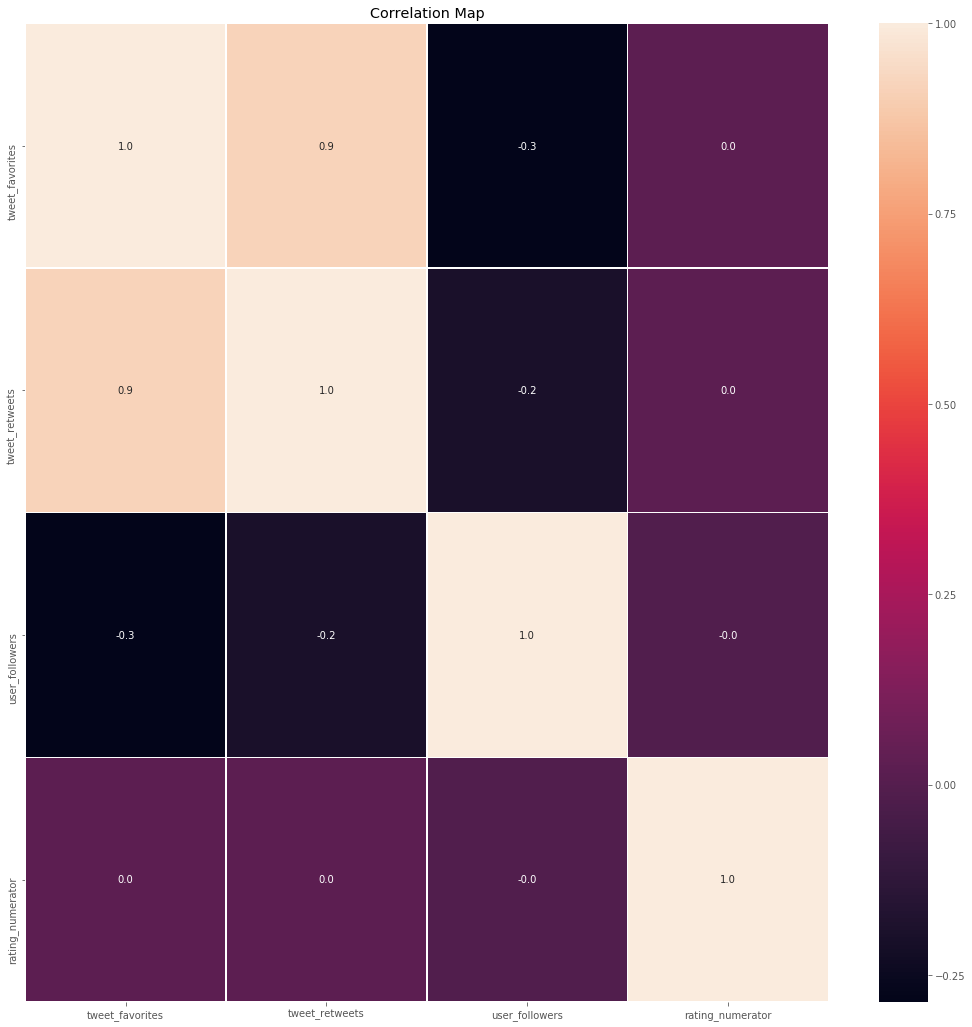

In [74]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(twitter_master[['tweet_source', 'tweet_favorites',
                       'tweet_retweets', 'user_followers', 
                       'rating_numerator']].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.title('Correlation Map')

- The only strong correlation we see here is between tweet_favorites and tweet_retweet, this is normal (more favorites mean more retweets)
- User followers and retweet have a weak negative correlation of -0.1 (this seems the opposite of normal prediction)

*let's dig more starting with the relation between tweet_favorites and tweet_retweets*

### tweet_favorites and tweet_retweets

Text(0.5,1,'Retweets and favorites Scatter plot')

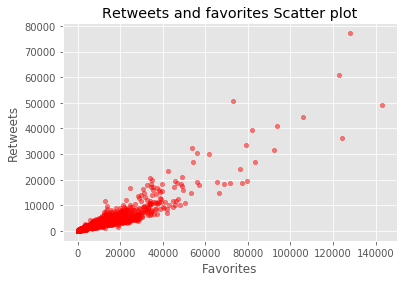

In [75]:
twitter_master.plot(kind = 'scatter', x = 'tweet_favorites', y = 'tweet_retweets', alpha = 0.5, color = 'red')
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Retweets and favorites Scatter plot')

From above graph, we can see as the retweets count goes high, favorites count too goes high.

In [76]:
top_retweet_count_url = twitter_master.tweet_url[twitter_master.tweet_retweets == max(twitter_master.tweet_retweets)]
print("The maximum number of retweet is: {}, for the tweet: {}".format(max(twitter_master.tweet_retweets), top_retweet_count_url))

top_favorites_count_url = twitter_master.tweet_url[twitter_master.tweet_favorites == max(twitter_master.tweet_favorites)]
print("The maximum number of favorites is: {}, for the tweet: {}".format(max(twitter_master.tweet_favorites), top_favorites_count_url))

The maximum number of retweet is: 77165, for the tweet: 775    https://twitter.com/dog_rates/status/744234799...
Name: tweet_url, dtype: object
The maximum number of favorites is: 143067, for the tweet: 309    https://twitter.com/dog_rates/status/822872901...
Name: tweet_url, dtype: object


### Famous Breeds

Text(0,0.5,'dog_breed')

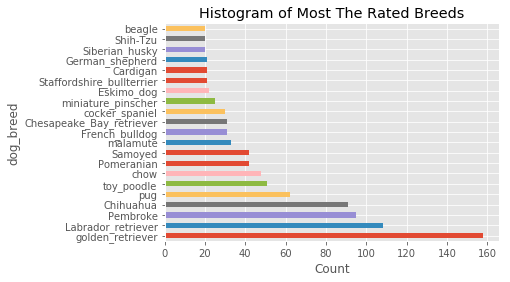

In [77]:
# Subset the data on the most owned for better result
twitter_by_breed = twitter_master.groupby('dog_breed').filter(lambda x: len(x) >= 20)

twitter_by_breed['dog_breed'].value_counts().plot(kind = 'barh')
plt.title('Histogram of Most The Rated Breeds')
plt.xlabel('Count')
plt.ylabel('dog_breed')

Top two famous breeds based on above graph are : Golden_retriver and Labrador_retriver

### Different dog stages

(-1.2885989008133931,
 1.2326798733068711,
 -1.2102916615879105,
 1.2096584165348752)

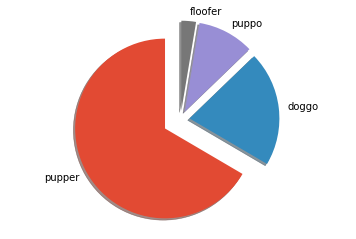

In [78]:
# Plot the data partitioned by dog stages

dog_stage_count = list(twitter_master[twitter_master['dog_stage'] != 'None']['dog_stage'].value_counts())[0:4]
dog_stages = twitter_master[twitter_master['dog_stage'] != 'None']['dog_stage'].value_counts().index.tolist()[0:4]
explode = (0.2, 0.1, 0.1, 0.1) 

fig1, ax1 = plt.subplots()
ax1.pie(dog_stage_count, explode = explode, labels = dog_stages, shadow = True, startangle = 90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

Text(0.5,1,'')

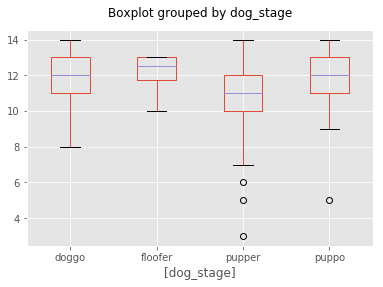

In [79]:
# Plot the dog stages with ratings
twitter_master[twitter_master['dog_stage'] != 'None'].boxplot(column = ['rating_numerator'], by = ['dog_stage'])
plt.title('')

In [80]:
twitter_master[twitter_master['dog_stage'] != 'None'].groupby('dog_stage')['rating_numerator'].mean()

dog_stage
doggo      11.888889
floofer    12.125000
pupper     10.629409
puppo      11.709677
Name: rating_numerator, dtype: float64

- Puppers represent the big number of our pie, but it has the lowest mean rating

# Conclusion 

The Twitter account WeRateDogs ([@dog_rates](https://twitter.com/dog_rates)) is devoted to humorously reviewing pictures of dogs doing adorable poses.

If you are thinking of adopting a dog, get a pupper to live for more time together. Also take pictures, and send them to @dog_rates and get funny cute comments with high rates :)